# <center> Сегментация клиентов онлайн магазина подарков

## Постановка задачи


<center> <img src=https://salesupnow.ru/storage/app/media/pipeople.png align="right" width="300"/> </center>

Маркетинг — неотъемлемая часть любого бизнеса. Для повышения прибыли компании важно понимать своего клиента, его пожелания и предпочтения. С появлением электронной коммерции, или онлайн-продаж, стало намного проще собирать данные о клиентах, анализировать их, находить закономерности и реализовывать маркетинговые кампании.

Большинство интернет-магазинов используют инструменты веб-аналитики, чтобы отслеживать просмотры страниц, количество и поведение посетителей и коэффициент отказов. Но отчёта из Google Analytics или аналогичной системы может быть недостаточно для полного понимания того, как клиенты взаимодействуют с сайтом. Компаниям важно иметь возможность быстро и точно реагировать на перемены в поведении клиентов, создавая инструменты, которые обнаруживают эти изменения практически в режиме реального времени.

Машинное обучение помогает поисковой системе анализировать огромное количество данных о посетителях платформы, узнавать модели поведения профессиональных покупателей, определять категорию клиентов (например, лояльные/перспективные/новички/спящие/ушедшие) и выбирать правильную стратегию взаимодействия с ними.

Стоит также отметить, что компании, использующие машинное обучение на своих платформах электронной коммерции, могут постоянно повышать эффективность бизнес-процессов: настраивать товарную выборку персонально для каждого покупателя и предлагать выгодную цену в соответствии с бюджетом клиента и т. д. Эта задача относится к категории построения рекомендательных систем, речь о которых пойдёт в следующем разделе нашего курса.

> Как правило, наборы данных для электронной коммерции являются частной собственностью и, следовательно, их трудно найти среди общедоступных данных. Однако [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)  создал набор данных, содержащий фактические транзакции за 2010 и 2011 годы. С ним нам как раз и предлагается поработать в этом кейсе. 

> В нашем распоряжении будет набор данных, который содержит все транзакции, произошедшие в период с 01/12/2010 по 09/12/2011 для базирующейся в Великобритании компании, занимающейся онлайн-розничной торговлей. Компания в основном продает уникальные подарки на все случаи жизни. Многие клиенты компании являются оптовиками.


**Бизнес-задача:** произвести сегментацию существующих клиентов, проинтерпретировать эти сегменты и определить стратегию взаимодействия с ними.

**Техническая задача для вас как для специалиста в Data Science:** построить модель кластеризации клиентов на основе их покупательской способности, частоты заказов и срока давности последней покупки, определить профиль каждого из кластеров.

**Основные цели проекта:**
1. Произвести предобработку исходного набора данных о транзакциях.
2. Провести разведывательный анализ данных и выявить основные закономерности.
3. Сформировать набор данных о характеристиках каждого из уникальных клиентов.
4. Построить несколько моделей машинного обучения, решающих задачу кластеризации клиентов, определить количество кластеров и проинтерпретировать их.
5. Спроектировать процесс предсказания категории интересов клиента и протестировать вашу модель на новых клиентах.




## Данные и их описание

Данные представляют собой таблицу в формате CSV, в каждой строке которой содержится информация об уникальной транзакции.

Признаки, описывающие каждую транзакцию:

* InvoiceNo — номер счёта-фактуры (уникальный номинальный шестизначный номер, присваиваемый каждой транзакции; буква "C" в начале кода указывает на отмену транзакции);
* StockCode — код товара (уникальное пятизначное целое число, присваиваемое каждому отдельному товару);
* Description — название товара;
* Quantity — количество каждого товара за транзакцию;
* InvoiceDate — дата и время выставления счёта/проведения транзакции;
* UnitPrice — цена за единицу товара в фунтах стерлингов;
* CustomerID — идентификатор клиента (уникальный пятизначный номер, однозначно присваиваемый каждому клиенту);
* Country — название страны, в которой проживает клиент.



Импорт базовых библиотек:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import warnings 

from IPython.display import display, HTML

warnings.filterwarnings("ignore")

plt.rcParams["patch.force_edgecolor"] = True

## 1. Знакомство со структурой данных

Первым делом необходимо понять, с какими данными предстоит работать, и произвести базовую предобработку данных — перевести признаки в необходимые для дальнейшей работы форматы.

Познакомьтесь с исходными данными поближе:

* Проведите статистический анализ исходных данных, посмотрев на основные диапазоны исходных признаков.
* Узнайте, сколько уникальных клиентов совершали транзакции в указанный период.
* Узнайте, из каких стран совершались транзакции.
* Исследуйте данные на наличие пропусков и дубликатов.
* Переведите столбцы в корректные форматы (например, даты в формат datetime).

In [3]:
data = pd.read_csv(
    "./data.csv", 
    encoding="ISO-8859-1", 
    dtype={'CustomerID': str,'InvoiceID': str}
)
print('Data shape: {}'.format(data.shape))
data.head(5)

Data shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


Converting to datetime fromat where needed and getting the time period size of transactions.

In [4]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
print('Date interval {} to {}'.format(data['InvoiceDate'].dt.date.min(), data['InvoiceDate'].dt.date.max()))

Date interval 2010-12-01 to 2011-12-09


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


Missing values are observeed in goods description and customer ID.

Gettng the distribution of values.

In [6]:
data.describe()

,Quantity,InvoiceDate,UnitPrice
count,541909.000000,541909,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114
min,-80995.000000,2010-12-01 08:26:00,-11062.060000
25%,1.000000,2011-03-28 11:34:00,1.250000
50%,3.000000,2011-07-19 17:17:00,2.080000
75%,10.000000,2011-10-19 11:27:00,4.130000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,218.081158,NaN,96.759853


The number of unique clients (unknown IDs are counted as a single category value).

In [7]:
len(list(data['CustomerID'].unique()))

4373

Countries where the goods are sold.

In [8]:
list(data['Country'].unique())

['United Kingdom',
 'France',
 'Australia',
 'Netherlands',
 'Germany',
 'Norway',
 'EIRE',
 'Switzerland',
 'Spain',
 'Poland',
 'Portugal',
 'Italy',
 'Belgium',
 'Lithuania',
 'Japan',
 'Iceland',
 'Channel Islands',
 'Denmark',
 'Cyprus',
 'Sweden',
 'Austria',
 'Israel',
 'Finland',
 'Bahrain',
 'Greece',
 'Hong Kong',
 'Singapore',
 'Lebanon',
 'United Arab Emirates',
 'Saudi Arabia',
 'Czech Republic',
 'Canada',
 'Unspecified',
 'Brazil',
 'USA',
 'European Community',
 'Malta',
 'RSA']

In [9]:
data[['Country', 'StockCode']].groupby(by='Country').agg('count')

,StockCode
Country,
Australia,1259
Austria,401
Bahrain,19
Belgium,2069
Brazil,32
Canada,151
Channel Islands,758
Cyprus,622
Czech Republic,30


Missing values are observed only in two categories. Only two varieables are numeric, one variable is datetime, the others are objects. The numeric variables range from negative values to high ones, which is due to product return. The goods are sold to the countries around the globe, though some countries are leading in purchase amount.
The number of unique clients is nearly 5000. Thus, our giftshop is a possibly small enterprise.

## 2. Преобразование, очистка и анализ данных

### 2.1. Преобразование и очистка данных о транзакциях

#### 2.1.1 Пропуски

Пропуски в столбце с идентификатором клиента (CustomerID) и описанием товара свидетельствуют о некорректных/незавершённых транзакциях. Удалите их из данных.

**Примечание.** Если посмотреть на распределение пропусков в столбцах Description и CustomerID, то можно заметить, что достаточно удалить строки, содержащие пропуски в столбце CustomerID, тогда пропуски в столбце Description удаляются автоматически.


In [10]:
data_clean = data.copy()
data_clean = data_clean.dropna(subset = ['CustomerID', 'Description'], axis=0)

In [11]:
data[(data['CustomerID'].isna() == True) & (data['Description'].isna() == True)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


#### 2.1.2. Дубликаты

Проверьте данные на наличие дубликатов. Удалите их из данных.


In [12]:
display(data_clean.duplicated().sum())
data_clean = data_clean.drop_duplicates()
display(data_clean.duplicated().sum())

5225

0

#### 2.1.3. Транзакции с отрицательным количеством товара

Из приведённых выше инсайтов о данных мы узнали все особенности отмены заказов. Когда мы будем сегментировать клиентов, мы будем определять их покупательскую способность. При расчёте покупательской способности нам будет очень важно учесть возвраты этого клиента.

Чтобы подсчитать количество возвратов, для начала нам надо определить, сколько уникальных товаров указано в транзакции (корзине) для каждой уникальной пары «клиент — заказ»:


In [13]:
temp = data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket.head()

,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24


**Примечание.** Более 16 % уникальных заказов являются возвратами. Интересный факт: если мы подсчитали количество транзакций, содержащих признак возврата, в изначальной таблице, где на каждый уникальный товар заведена отдельная строка, то мы получили бы, что количество возвратов менее 1 %. Однако это число было бы некорректным.

Создайте в ваших данных о транзакциях признак `QuantityCanceled`. Этот признак будет указывать на количество отменённого впоследствии товара для каждой транзакции, на которую найдётся противоположная ей транзакция с возвратом. Для транзакций, для которых не было возвратов, признак будет равен 0. Для транзакций, для которых указано отрицательное количество товара, но в данных отсутствует контрагент, признак будет пустым.

В качестве вспомогательного инструмента мы подготовили для вас функцию `get_quantity_canceled()`. Эта функция принимает на вход таблицу с транзакциями и возвращает объект `Series` — столбец, в котором указано количество отменённого впоследствии товара для каждой транзакции. Если транзакция не имеет контрагента, этот признак помечается как `NaN`.

Отметим, что эта функция не учитывает сложный случай, когда количество отменённого товара в транзакции-возврате больше, чем количество товара, которое указано в любой из отдельных транзакций на покупку (это случай, когда клиент сделал несколько заказов одного и того же товара, а потом оформил возврат на все товары разом). При желании вы можете самостоятельно модифицировать функцию для предобработки, чтобы учесть этот пограничный случай.

*Осторожно! Поиск отменённых транзакций занимает много времени из-за большого количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от мощности компьютера.*

In [14]:
def get_quantity_canceled(data):
    """Функция для создания признака количества отменённых заказов. 
    Функция принимает на вход таблицу и возвращает столбец, в котором указано количество отменённого впоследствии товара для кажой транзакции.
    Если транзакция с отрицательным количеством товара не имеет контрагента, данный признак помечается как NaN.

    Args:
        data (DataFrame): таблица с транзакциями

    Returns:
        Series: столбец с количеством отменённого товара
    """
    # Инициализируем нулями Series той же длины, что и столбцы таблицы.
    quantity_canceled = pd.Series(np.zeros(data_clean.shape[0]), index=data_clean.index)    
    negative_quantity = data_clean[(data_clean['Quantity'] < 0)].copy()
    for index, col in negative_quantity.iterrows():
        # Создаём DataFrame из всех контрагентов
        df_test = data_clean[(data_clean['CustomerID'] == col['CustomerID']) &
                       (data_clean['StockCode']  == col['StockCode']) & 
                       (data_clean['InvoiceDate'] < col['InvoiceDate']) & 
                       (data_clean['Quantity'] > 0)].copy()
        # Транзация-возврат не имеет контрагента — ничего не делаем
        if (df_test.shape[0] == 0): 
            # Помечаем столбец как пропуск
            quantity_canceled.loc[index] = np.nan
        # Транзакция-возврат имеет ровно одного контрагента
        # Добавляем количество отменённого товара в столбец QuantityCanceled 
        elif (df_test.shape[0] == 1): 
            index_order = df_test.index[0]
            quantity_canceled.loc[index_order] = -col['Quantity']       
        # Транзакция-возврат имеет несколько контрагентов
        # Задаём количество отменённого товара в столбец QuantityCanceled для той транзакции на покупку,
        # в которой количество товара больше количества товаров в транзакции-возврате.
        elif (df_test.shape[0] > 1): 
            df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
            for ind, val in df_test.iterrows():
                if val['Quantity'] < -col['Quantity']: 
                    continue
                quantity_canceled.loc[ind] = -col['Quantity']
                break    
    return quantity_canceled

data_clean['QuantityCanceled'] = get_quantity_canceled(data_clean)

*Осторожно! Поиск отмененных транзакций занимает достаточно длительное время из-за количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от компьютера.*

Узнайте, сколько транзакций в данных не имеют контрагентов, и, если их количество невелико, удалите их из данных.

Когда вы разобрались с возвратами, удалите транзакции с отрицательным количеством товара — они нам больше не нужны.



In [56]:
#Counting the number of transactions with no counterparties
na_percentage = data_clean[data_clean['QuantityCanceled'].isna()].shape[0]/data_clean.shape[0]*100
print('Since the percentage of transactions is {}%, deleting na values'.format(round(na_percentage, 2)))

#Cleaning the dataset from such transactions and negative number of goods
data_fin = data_clean.drop(data_clean[data_clean['QuantityCanceled'].isna()].index)
data_fin = data_fin[data_fin['Quantity'] >= 0 ]


Since the percentage of transactions is 0.32%, deleting na values


#### 2.1.4. Специализированные транзакции

Следующая задача — обработать специальные виды транзакций, которые обозначаются латинскими буквами.

В данных присутствует шесть специальных видов транзакций. С помощью регулярных выражений найдите такие коды товаров (StockCode), которые начинаются с латинских букв (при этом коды могут содержать цифры).

**Подсказка.** В качестве шаблона для поиска используйте строку '^[a-zA-Z]+'.

Чтобы понять, что означают эти коды, можно заглянуть в столбец с описанием (Description), например POST означает почтовые расходы, C2 — расходы на транспортировку, BANK CHARGES — банковские расходы.

Специальные операции не характеризуют покупательскую способность клиентов, так как не относятся напрямую к их покупкам, поэтому такие записи нам не нужны. Удалите все специальные транзакции из таблицы.

In [57]:
display(data_fin[data_fin['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['Description'].unique())
data_useful = data_fin.drop(data_fin[data_fin['StockCode'].str.contains('^[a-zA-Z]+', regex=True)].index)

array(['POSTAGE', 'CARRIAGE', 'Manual', 'Bank Charges',
       'PADS TO MATCH ALL CUSHIONS', 'DOTCOM POSTAGE'], dtype=object)

#### 2.1.5. Транзакции с товарами без стоимости

При просмотре описательных статистик можно заметить, что на некоторые товары установлена цена в 0 фунтов стерлингов. Таких транзакций оказывается менее 1 % — можно удалить их.

In [58]:
print(data_useful[data_useful['UnitPrice'] == 0].shape[0])
data_useful = data_useful[data_useful['UnitPrice'] != 0]

33


#### 2.1.6. Общая стоимость товаров в транзакции

Добавьте в ваш датасет общую цену заказа (TotalPrice). Она рассчитывается как:
 
 **общая цена = цена за единицу товара * (количество товаров в заказе - количество возвращённых товаров).**

Этот признак впоследствии поможет вам рассчитать покупательскую способность каждого из клиентов.

In [59]:
data_useful['TotalPrice'] = data_useful['UnitPrice']*(data_useful['Quantity'] - data_useful['QuantityCanceled'])
data_useful.to_csv('data_cleaned.csv')

Помимо рекомендованных преобразований, вы также можете придумать собственные и применить их к исходным данным.
После завершения предобработки сохраните результат очищения данных в отдельный файл, чтобы впоследствии вам не приходилось повторять эти действия.


### 2.2. Разведывательный анализ

После предобработки исходных данных произведите разведывательный анализ и исследуйте транзакции, ответив на следующие вопросы:

* Клиенты из каких стран покупают больше и чаще?
* Какие страны приносят наибольшую сезонную выручку?
* Присутствует ли в продажах сезонность (когда покупают чаще)?
* Сгруппируйте данные по датам и часам совершения транзакции и найдите количество заказов на каждый день-час. Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов.
* Каково распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции)? 

**Примечание.** Вы можете сформулировать и другие вопросы. Главная цель — извлечь максимум понятной информации из исходных данных.

Свои рассуждения сопроводите графиками и диаграммами.



Клиенты из каких стран покупают больше и чаще?

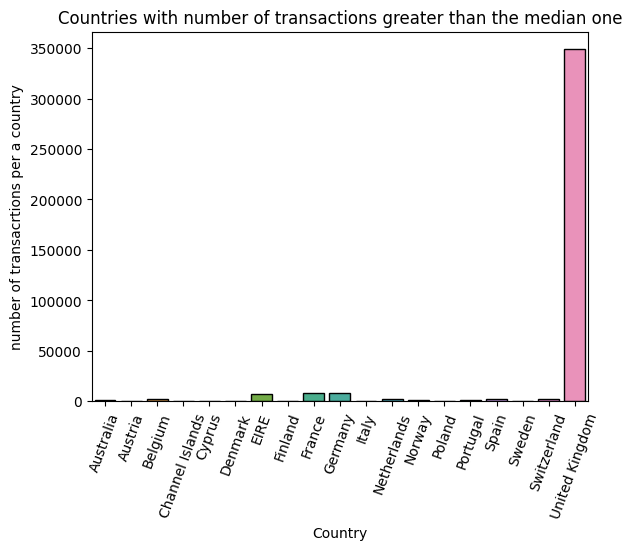

In [ ]:
#Aggregating data by country, counting the number of transactions
data_agg_freq = data_useful[['Country', 'StockCode']].groupby(by='Country', as_index=False).aggregate('count')
#For better visualisation filtering out values lower than the median
data_agg_greatest = data_agg_freq[data_agg_freq['StockCode'] >= data_agg_freq['StockCode'].median()]

#plotting the barplot
sns.barplot(data_agg_greatest, x='Country', y='StockCode');
plt.xticks(rotation=70)
plt.title('Countries with number of transactions greater than the median one')
plt.ylabel('number of transacrtions per a country')
plt.show()

The greatest number of transactions are observed for UK, EIRE, France, and Germany.

Какие страны приносят наибольшую сезонную выручку?

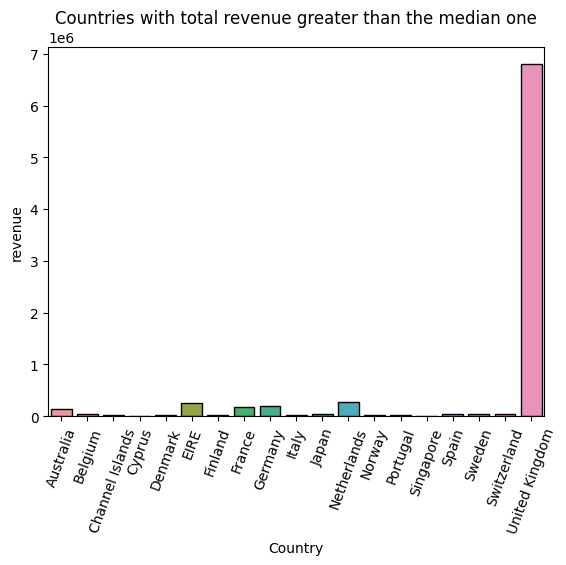

In [ ]:
#Aggregating, calcualting total revenue and filtering for 
#better presnetation
data_agg_revenue = data_useful[['Country', 'TotalPrice']].groupby(by='Country', as_index=False).aggregate('sum')
data_agg_revenue = data_agg_revenue[data_agg_revenue['TotalPrice'] >= data_agg_revenue['TotalPrice'].median()]

#Plotting the barplot
sns.barplot(data_agg_revenue, x='Country', y='TotalPrice');
plt.xticks(rotation=70)
plt.title('Countries with total revenue greater than the median one')
plt.ylabel('revenue')
plt.show()

UK, Netherlands, Germany, France, EIRE, and Australia are the top 6 countires with the greatest year revenue.

Присутствует ли в продажах сезонность (когда покупают чаще)?

In [ ]:
#Creating a variable repersenting the season 
#when a transaction occurred
data_useful['Season'] = np.zeros(data_useful.shape[0])


#Specifying the corresponding season
for record in data_useful['InvoiceDate']:
    if record >= pd.Timestamp('2010-12-01') and record < pd.Timestamp('2011-03-01'):
        data_useful['Season'][data_useful['InvoiceDate'] == record] = 'Winter'
    elif record >= pd.Timestamp('2011-03-01') and record < pd.Timestamp('2011-06-01'):
        data_useful['Season'][data_useful['InvoiceDate'] == record] = 'Spring'
    elif record >= pd.Timestamp('2011-06-01') and record < pd.Timestamp('2011-09-01'):
        data_useful['Season'] [data_useful['InvoiceDate'] == record] = 'Summer'
    elif record >= pd.Timestamp('2011-09-01') and record < pd.Timestamp('2011-12-01'):
        data_useful['Season'][data_useful['InvoiceDate'] == record] =  'Autumn'
    else:
        data_useful['Season'][data_useful['InvoiceDate'] == record] = 'Out of period'

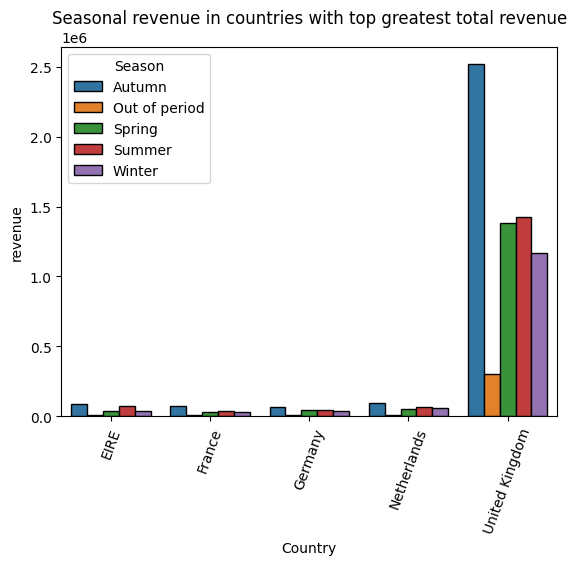

In [ ]:
#Aggregating by country and season
data_agg_sr = data_useful[['Country', 'Season', 'TotalPrice']].groupby(by=['Country', 'Season'], as_index=False).aggregate('sum')

#Getting the top by the highest revenue
total_top = list(data_agg_sr.groupby('Country')['TotalPrice'].agg('sum').sort_values(ascending=False).iloc[:5].index)
data_agg_sr_top5 = data_agg_sr[data_agg_sr['Country'].isin(total_top)]

#Plotting
sns.barplot(data_agg_sr_top5, x='Country', y='TotalPrice', hue='Season');
plt.xticks(rotation=70)
plt.title('Seasonal revenue in countries with top greatest total revenue')
plt.ylabel('revenue')
plt.show()

The greatest revenue for these countries is obtained in Autumn.

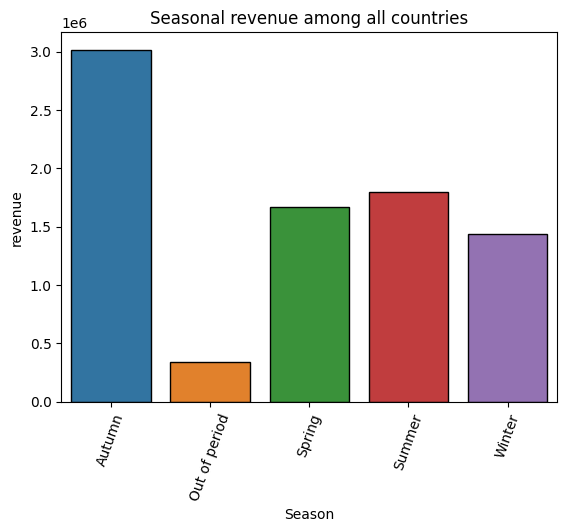

In [ ]:
#Visualisibg the total revenue of the company by seasons
data_agg_seasonal = data_useful[['Season', 'TotalPrice']].groupby(by=['Season'], as_index=False).aggregate('sum')
sns.barplot(data_agg_seasonal, x='Season', y='TotalPrice');
plt.xticks(rotation=70)
plt.title('Seasonal revenue among all countries')
plt.ylabel('revenue')
plt.show()

The greatest revenue is indeed obtained in Autumn. Meanwhile, the other seasons share nearly the same revenue amount.

Сгруппируйте данные по датам и часам совершения транзакции и найдите количество заказов на каждый день-час. Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов. 
Каково распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции)? 

In [46]:
#Exctracting information on hour, date
data_useful['hour'] = pd.to_datetime(data_useful['InvoiceDate']).dt.hour
data_useful['date'] = pd.to_datetime(data_useful['InvoiceDate']).dt.date

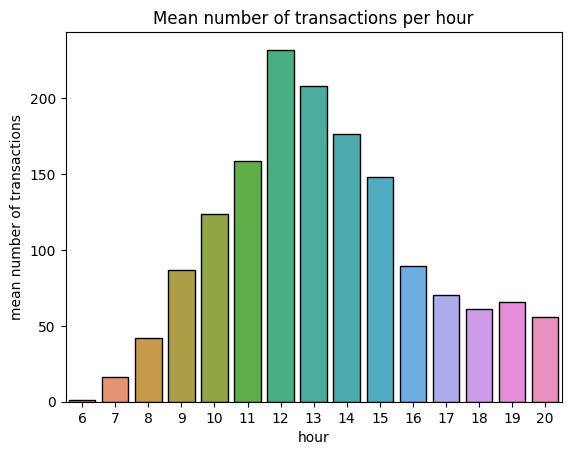

In [45]:
#Aggregating by date and hour
data_by_time = data_useful[['date', 'hour', 'InvoiceNo']].groupby(by=['date', 'hour'], as_index=['date']).agg('count')
data_by_hour = data_by_time.groupby(by=['hour']).agg('mean')

#Plotting the distribution of mean number of daily transactions per hour
sns.barplot(data_by_hour, x=data_by_hour.index, y='InvoiceNo')
plt.title('Mean number of transactions per hour')
plt.ylabel('mean number of transactions');


The peak of transactions number is 12:00, which can possibly be the time when the highest revenue is obtained. The mean number of transactions stabilly increases from early morning till afternoon and then decreases, remaining nearly stable from 17:00 till 20:00.

### 2.3. Построение RFM-таблицы и поиск RFM-выбросов

Мы добрались до самой интересной части нашей задачи. Нам предстоит сформировать признаки, на основе которых мы будем производить сегментацию клиентов.

Для этого давайте познакомимся с очень популярным методом для анализа потребительской ценности под названием RFM. 

<center> <img src=https://miro.medium.com/max/1400/1*uYQjy9SUjW7iWHc2gGanQQ.png align="right" width="400"/> </center>

Метод заключается в группировке клиентов на основе следующих параметров:
* Recency (Давность) — давность последней покупки клиента;
* Frequency (Частота) — общее количество покупок клиента;
* Monetary Value (Денежная ценность) — сколько денег потратил клиент.


Суть RFM-анализа состоит в том, что мы разделяем всех клиентов на группы в зависимости от того, как давно они сделали последнюю покупку, как часто покупали и насколько большой была сумма их заказов. 

Например, вот так может выглядеть интерпретация кластеров для случая RF-сегментации (анализа на основе давности и частоты заказов клиента):

<img src=https://retailrocket.ru/wp-content/uploads/2017/06/rfm-1.png>

Задача маркетологов — вести клиента в зону лояльных.

Мы можем рассчитать RFM-характеристики для каждого из клиентов в нашем датасете и на их основе с помощью методов кластеризации построить подобные сегменты клиентов, привязанные к нашим данным.

Чтобы получить RFM-таблицу, нам необходимо сгруппировать данные по идентификаторам клиента и рассчитать следующие  агрегированные характеристики:

* Recency для i-го клиента рассчитывается как разница между датой и временем последнего заказа и точкой отсчёта, переведённая в дни:
    $$t_0-max(t_{i1}, t_{i2},..., t_{iM})$$

    где $t_{ij}$ — дата и время совершения i-ым клиентом своей j-ой покупки.

    В качестве точки отсчёта $t_0$ берём дату на один день «старше», чем все наши данные. Это будет 10 декабря 2011 года (в формате datetime — '2011-12-10 00:00:00').

* Frequency рассчитывается как общее количество уникальных заказов, которые совершил i-ый клиент.
* Monetary Value рассчитывается как общая сумма денег, которую i-ый клиент потратил на наши товары (с учётом возвратов).

Когда вы рассчитаете все характеристики, не забудьте дать столбцам результирующей таблицы соответствующие названия.

In [ ]:
#Setting the reference timepoint
t0 = pd.to_datetime('2011-12-10 00:00:00')

#Creating an RFM rable
rfm_table = data_useful.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (t0 - x.max()).days,  # Recency
    'InvoiceNo': lambda x: x.unique().shape[0],  # Frequency
    'TotalPrice': lambda x: x.sum()  # Monetary Value
}).reset_index()

#Setting column names
rfm_table.columns = ['CustomerID','Recency', 'Frequency', 'MonetaryValue']

rfm_table


,CustomerID,Recency,Frequency,MonetaryValue
0,12346,325,1,0.00
1,12347,2,7,4310.00
2,12348,75,4,1437.24
3,12349,18,1,1457.55
4,12350,310,1,294.40
...,...,...,...,...
4329,18280,277,1,180.60
4330,18281,180,1,80.82
4331,18282,7,2,176.60
4332,18283,3,16,2039.58


После того как вы подготовите RFM-таблицу, визуализируйте каждую из трёх компонент, например, в виде коробчатых диаграмм (boxplot). Вы получите примерно следующие результаты (графики могут отличаться в зависимости от того, как вы выполните предобработку данных):

In [ ]:
#Setting separate boxplots
boxes = [px.box(rfm_table, x=column) for column in rfm_table.columns[1:]]

#Creating a figure
fig = make_subplots(
    rows=1, cols=3, 
    subplot_titles=(
        "Recency","Frequency", "MonetaryValue"
    )
)

#Adding traces
for i, box in enumerate(boxes):
    fig.add_trace(boxes[i]['data'][0], row=1, col=i+1)

#Saving the output and displaying the figure
fig.update_layout(showlegend=True)
fig.write_html('boxplot_1.html')
fig.show()


Что интересного здесь можно увидеть? Есть клиенты с аномально большим количеством сделанных заказов (более 100 штук), а также клиенты, общая стоимость заказов которых превышает 190 тысяч фунтов стерлингов.

Чем это плохо? Выбросы могут отрицательно сказаться на результатах работы методов кластеризации, неустойчивых к ним, например алгоритма KMeans, поэтому хотелось бы от них избавиться. Однако терять много ценных данных о клиентах тоже не хочется, поэтому ограничимся верхней границей соответствующей квантили уровня 0.95. Таким образом, мы удалим данные тех клиентов, для которых значение параметра Frequency или параметра Monetary выше, чем у 95 % клиентов.


In [ ]:
#Filtering the table cutting by the 95% quantile,
#getting rid of outliers
rfm_table_filt = rfm_table[
    (rfm_table['Frequency'] <= rfm_table['Frequency'].quantile(0.95)) & 
    (rfm_table['MonetaryValue'] <= rfm_table['MonetaryValue'].quantile(0.95))]

In [233]:
rfm_table_filt

,CustomerID,Recency,Frequency,MonetaryValue
0,12346,325,1,0.00
1,12347,2,7,4310.00
2,12348,75,4,1437.24
3,12349,18,1,1457.55
4,12350,310,1,294.40
...,...,...,...,...
4328,18278,73,1,173.90
4329,18280,277,1,180.60
4330,18281,180,1,80.82
4331,18282,7,2,176.60


In [ ]:
#Checking the results of filtration
rfm_tableboxes = [px.box(rfm_table_filt, x=column) for column in rfm_table_filt.columns[1:]]

fig2 = make_subplots(
    rows=1, cols=3, 
    subplot_titles=(
        "Recency","Frequency", "MonetaryValue"
    )
)

for i, box in enumerate(rfm_tableboxes):
    fig2.add_trace(rfm_tableboxes[i]['data'][0], row=1, col=i+1)

fig2.update_layout(showlegend=True)
fig2.write_html('boxplot_1.html')
fig2.show()

## 3. Моделирование и оценка качества моделей

### 3.1. Кластеризация на основе RFM-характеристик

Чтобы результаты кластеризации было удобнее интерпретировать, вы можете уменьшить размерность исходных признаков до двух компонент.

**Подсказка.** Чтобы методы понижения размерности работали стабильно, данные необходимо стандартизировать/нормализовать. Для удобства оберните эти шаги по предобработке данных в pipeline.

Произведите предобработку исходных данных. На основе RFM-признаков кластеризуйте клиентов онлайн-магазина подарков с помощью известных вам методов (используйте минимум три метода).

Подберите оптимальное количество кластеров для выбранных методов с помощью коэффициента силуэта, перебирая возможные значения от 3 до 10 включительно (большее или меньшее количество кластеров будет нерелеватно для маркетинга). 

Выберите алгоритм с наибольшим коэффициентом силуэта, сделайте предсказание меток кластеров.


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


def data_preprocessing(data):
    """The function to scale input data
    and lower the dimension with PCA.
    Args:
        data (DataFrame): filtered transcations table
    Returns:
        np.array: principal components
    """
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(data_scaled)
    return principalComponents

data_rfm_pca = data_preprocessing(rfm_table_filt.iloc[:,1:])
data_rfm_pca

array([[-2.13520066,  1.40159569],
       [ 3.44712453,  0.85287213],
       [ 0.62910337,  0.08321704],
       ...,
       [-1.42102558,  0.16834651],
       [-0.31933001, -1.19828491],
       [ 0.77186997, -0.15752725]])

3 0.524229665654148
4 0.49755278845637857
5 0.4545444972935232
6 0.44800609039037625
7 0.42029546965842235
8 0.4207447292287864
9 0.4089571765040919
10 0.39784347736723646


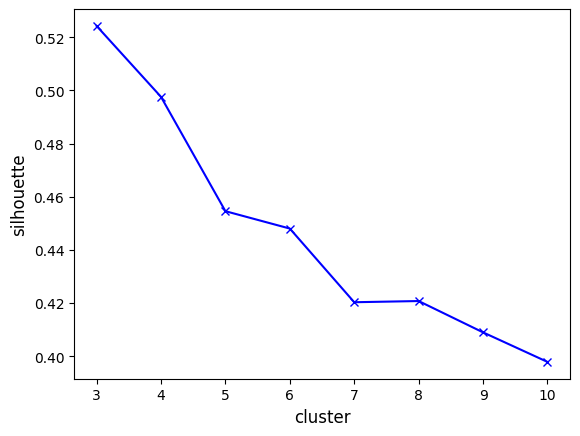

In [ ]:
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

#Saving silhouette scores to a list
sil_sc = []
for i in range(3,11):
    #defining clusterisation algorithm
    km = KMeans(n_clusters=i, random_state=42, init='k-means++')
    #training on our data
    km.fit_predict(data_rfm_pca)
    #getting silhouette scores
    sil_sc.append(silhouette_score(data_rfm_pca, km.labels_, metric='euclidean'))
    y_pred = km.labels_
    print(i, silhouette_score(data_rfm_pca, y_pred))

#Plotting the results
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(3, 11)], sil_sc, 'xb-');

An optimal cluster number for Kmeans is 3.

3 0.43606149772658104
4 0.3501027804470042
5 0.24696924689017877
6 0.2666696444349456
7 0.19885132009228107
8 0.19687980172305725
9 0.15762651806881495
10 0.10944495172070938


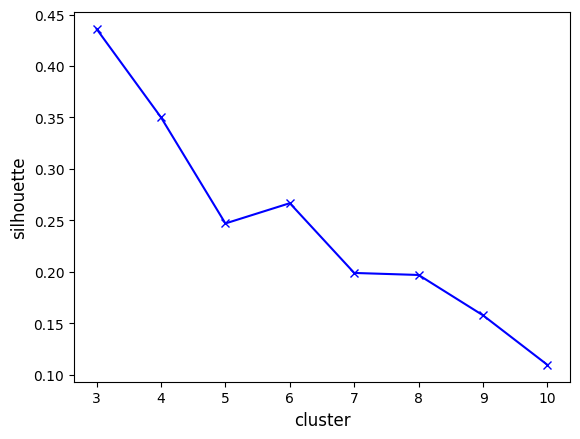

In [ ]:
from sklearn.mixture import GaussianMixture

#Repeating the same with another algorithm
sil_sc_gm = []
for i in range(3,11):
    gm = GaussianMixture(n_components=i, random_state=42)
    gm_labels = gm.fit_predict(data_rfm_pca)
    sil_sc_gm.append(silhouette_score(data_rfm_pca, gm_labels, metric='euclidean'))
    print(i, silhouette_score(data_rfm_pca, gm_labels))

plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(3, 11)], sil_sc_gm, 'xb-');

The optimal number of clusters is 3 according to GaussianMixture.

In [ ]:
from sklearn.cluster import DBSCAN

#Defining another one algorithm and training it
db = DBSCAN()
db.fit_predict(data_rfm_pca)
labels = db.labels_

#Getting the number of predicted clusters and a silhouette score
n_db_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(n_db_clusters)
print(silhouette_score(data_rfm_pca, labels))
print(np.unique(labels))

1
0.4580489594193886
[-1  0]


In [ ]:
#Choosing and implementing the best algorithm
km = KMeans(n_clusters=3, random_state=42, init='k-means++')
km.fit_predict(data_rfm_pca)

#saving labels to the dataset
km_labels = km.labels_

The optimal number of clusters is 2 according to DBSCAN, including outliers.

The highest silhouettescore was received with Kmeans. Choosing this algorithm for further analysis. The optimal number of clusters is 3.

### 3.2. Интерпретация результатов кластеризации

Перейдём к интерпретации полученных кластеров.

#### 3.2.1. Визуализация кластеров

Визуализируйте результаты в виде 3D-диаграммы с осями Recency, Frequency и Monetary. Проанализируйте полученную диаграмму и попробуйте понять, какие кластеры у вас получились.

In [261]:
rfm_table_filt['cluster'] = km_labels
px.scatter_3d(rfm_table_filt, x='Recency', y='Frequency', z='MonetaryValue', color='cluster')

Three clusters were received. The results seem plausible.

1) Cluster 0. High recency (max - half year before the end of the analysed period) and mainly low frequency. These clients have the least monetary value. The cluster could include newbies and perspective clients
2) Cluster 2. Low recency and low frequency. These clients have the least monetary value. The cluster possibly includes sleeping clients, those in the risk zone, and "accidental" ones (few orders long time before the end of the period).
3) Cluster 1. The cluster includes clients with the highest frequency and monetary value. Though the recency is low. Possibly, these clinets are closer to the sleeping category. However, there are also clients in the risk zone or to be lost.


#### 3.2.2. Построение профиля кластеров

Далее составьте так называемый профиль кластеров. Для этого вам необходимо вернуться от декомпозированных данных (если вы производили понижение размерности) к RFM-таблице (очищенной от выбросов).

Сгруппируйте RFM-таблицу по полученным кластерам и рассчитайте среднее по каждому из признаков.

Чтобы результаты было проще интерпретировать, давайте познакомимся с одним из способов визуализации профиля кластеров — **Radar Chart** (полярная диаграмма, или диаграмма паутины). Это графическое представление значений нескольких эквивалентных категорий в форме паутины.

Radar Chart часто используется при определении профиля кластеров. На концах паутины откладываются оси, соответствующие признакам, описывающим объекты. На каждой из осей для каждого кластера откладываются средние значения соответствующих характеристик. Соединив точки по осям, мы получаем многоугольник. 

Пример полярной диаграммы для задачи кластеризации учеников по интересам:

<img src=https://www.datanovia.com/en/wp-content/uploads/2020/12/radar-chart-in-r-customized-fmstb-radar-chart-1.png width=500>

На этой диаграмме мы видим визуализацию признаков для одного из кластеров. Видно, что ученики, принадлежащие этому кластеру, в большей степени увлекаются музыкой (Music), а в меньшей — программированием (Programm).

В модуле `graph_objects` библиотеки `plotly` есть встроенная функция `Scatterpolar`, которая позволяет построить полярную диаграмму. На основе этой функции мы подготовили для вас функцию `plot_cluster_profile()`, которая позволяет визуализировать профиль каждого из кластеров в виде полярной диаграммы. У неё есть два параметра: `grouped_data` — сгруппированные по кластерам характеристики объектов (клиентов), `n_clusters` — количество кластеров.

Главное условие использования полярной диаграммы — все признаки должны быть приведены к единому масштабу с помощью нормализации, где 1 будет означать максимум, а 0 — минимум. Шаг с нормализацией мы также добавили в функцию `plot_cluster_profile()`.


In [251]:
from sklearn.preprocessing import MinMaxScaler

def plot_cluster_profile(grouped_data, n_clusters):
    """Функция для визуализации профиля кластеров в виде полярной диаграммы.

    Args:
        grouped_data (DataFrame): таблица, сгруппированная по номерам кластеров с агрегированными характеристиками объектов.
        n_clusters (int): количество кластеров
    """
    # Нормализуем сгруппированные данные, приводя их к масштабу 0-1.
    scaler = MinMaxScaler()
    grouped_data = pd.DataFrame(scaler.fit_transform(grouped_data), columns=grouped_data.columns)
    # Создаём список признаков
    features = grouped_data.columns
    # Создаём пустую фигуру
    fig = go.Figure()
    # В цикле визуализируем полярную диаграмму для каждого кластера
    for i in range(n_clusters):
        # Создаём полярную диаграмму и добавляем её на общий график
        fig.add_trace(go.Scatterpolar(
            r=grouped_data.iloc[i].values, # радиусы
            theta=features, # название засечек
            fill='toself', # заливка многоугольника цветом
            name=f'Cluster {i}', # название — номер кластера
        ))
    # Обновляем параметры фигуры
    fig.update_layout(
        showlegend=True, # отображение легенды
        autosize=False, # устаналиваем свои размеры графика
        width=800, # ширина (в пикселях)
        height=800, # высота (в пикселях)
    )
    # Отображаем фигуру
    fig.show()

Теперь у вас есть удобный инструмент для анализа профиля кластеров. Воспользуйтесь им, чтобы проинтерпретировать результаты, полученные на предыдущем шаге.

In [260]:
grouped_rfm_tabel = rfm_table_filt[['Frequency', 'Recency', 'MonetaryValue', 'cluster']].groupby(by='cluster').agg('mean')
display(grouped_rfm_tabel)
plot_cluster_profile(grouped_rfm_tabel, 3)

,Frequency,Recency,MonetaryValue
cluster,,,
0,1.403403,253.474474,386.277297
1,7.068299,31.943299,2657.746997
2,2.329220,51.221684,660.068947


The results coincide with those received after the dotplot visualisation. However, Cluster 0 seem strange due to the lowest frequency. Though, the frequency about 1 is indeed the mean value of this group, which can be also seen from the dotplot.

## 5. Выводы и оформление работы

Напишите заключение о проделанной работе и полученных результатах. Отметьте, какие сегменты клиентов вам удалось найти в данных.

После завершения проекта создайте в своём репозитории файл README.md и кратко опишите содержимое проекта по принципу, который мы приводили ранее.

Выложите свой проект на GitHub и оформите удалённый репозиторий, добавив в него описание и теги репозитория (теги придумайте самостоятельно в зависимости от того, какую задачу вы решали).

## CONCLUSION:

The dataset was investigated and prepared for further analysis.
EDA was performed. The top 6 highest year revenue is obtained from clients living in UK, Netherlands, Germany, France, EIRE, and Australia. Sellings are subject to seasonal factor, with the greatest revenue earned in Autumn. Since UK brings the highest revenue, the regional features could be studied to maintain the revenue and attract clients from other regions. Since Black Friday is held in Autumn in UK, the skewness to this factor can be studied in depth for more effectiveness of selligns.
The peak of transactions occurs at 12:00, which could be the prime time for attracting the clients with advertisments.

The data was divided into three main segments. First, the cluster of perspective clients and newbies. These clients can potentially bring more revenue in future. Second, the segment of clients who brought high revenue in past, but are not active in the end of the analysed period. Threfore, these clients are "sleeping" or at the edge of being lost and require further actions to be turned into loyal. An advertising campaign could bring them back. Third, the last category includes clients with low frequency and recency. These clients acquired goods only at the start of the period, but the number of transcations is also low. Threfore, these clients are potentially lost due to their low activity for a long time. Possibly, a research on shortcomings of the business, conducting a survey of client preferenes could close the gap. 